# Metropolis algorithm example using tensorflow probability

In [1]:
%pip install tensorflow tensorflow-probability  --break-system-packages

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
import tensorflow as tf
import tensorflow_probability as tfp
import numpy as np
import matplotlib.pyplot as plt

2024-03-01 20:08:56.359094: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-03-01 20:08:58.352662: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-01 20:08:58.352778: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-01 20:08:58.662828: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-03-01 20:08:59.261339: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-03-01 20:08:59.262918: I tensorflow/core/platform/cpu_feature_guard.cc:1

In [3]:
# Generate random number distribution with Gaussian probability distribution 

# see: https://www.tensorflow.org/probability/examples/TensorFlow_Distributions_Tutorial
tfd = tfp.distributions

# Define the mean and standard deviation of the Gaussian distribution
mu = 5.0  # Mean
sigma = 1.0  # Standard deviation

# Create a Normal (Gaussian) distribution object
dist = tfd.Normal(loc=mu, scale=sigma)

# Generate 100 random samples from the distribution
samples = dist.sample(100)

In [4]:
# Print the first 5 samples
print("First 5 samples:", samples.numpy()[:5])

# Calculate the probability of a specific value (e.g., 6.5) under the distribution
value = 6.5
probability = dist.prob(value)
print(f"Probability of {value} under the distribution: {probability.numpy()}")

First 5 samples: [5.6034136 6.1435666 6.0455866 4.072161  5.1059327]
Probability of 6.5 under the distribution: 0.1295175850391388


Text(0, 0.5, 'Probability')

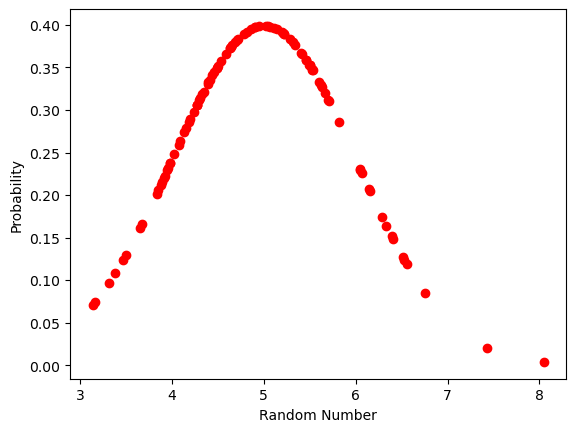

In [5]:
# Plot the probability distribution of the random numbers
plt.plot(samples.numpy(),dist.prob(samples.numpy()),'ro')
plt.xlabel("Random Number")
plt.ylabel("Probability")

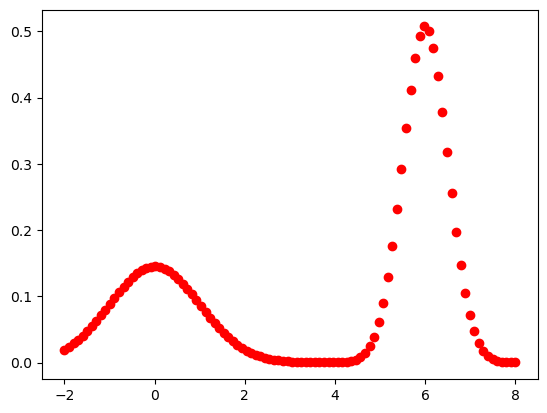

In [6]:
# Generate a probabilty distribution equal to the sum of 3 Gaussians
pis = [1., 1.75] # probabilities
mus = [0., 6.]   # centers
sigmas = [1., .5]# sigmas


gm = tfd.MixtureSameFamily(
      mixture_distribution=tfd.Categorical(
          probs=pis),   # One for each component.
      components_distribution=tfd.Normal(
        loc=mus,        # same here
        scale=sigmas))  # same here

x = np.linspace(min(mus)-2, max(mus)+2, 100)
plt.plot(x, gm.prob(x).numpy(),"ro")


In [7]:
dtype = np.float32 # keep consitant datatype
# Target distribution
target = gm # tfd.Normal(loc=dtype(0), scale=dtype(1))

# kernel that implements the Metropolis Hastings algorithm
mh = tfp.mcmc.MetropolisHastings(
    # single step randowm walk
    tfp.mcmc.UncalibratedRandomWalk(target.log_prob,
                                  new_state_fn=tfp.mcmc.random_walk_uniform_fn(scale=max(mus)-min(mus))) # uniform step distribution
)

samples = tfp.mcmc.sample_chain(
    1000,
    current_state=dtype(1),
    kernel=mh,
    num_burnin_steps=0,
    trace_fn=None,
)


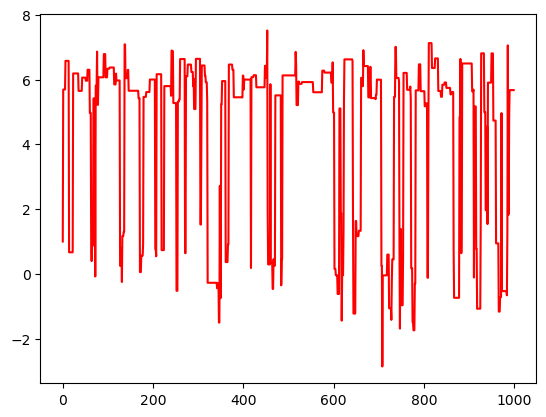

In [8]:
x = np.linspace(min(mus)-2, max(mus)+2, 100)
plt.plot(samples.numpy(),"r-")